In [2]:
%matplotlib inline

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltools.stats import regress
from nltools.external import glover_hrf

## One Sample t-test


$$
\begin{bmatrix}
s_1 \\
s_2 \\
s_3 \\
s_4 \\
s_5 \\
s_6
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 \\
1 \\
1 \\
1 \\
1 \\
1
\end{bmatrix}
\begin{bmatrix}
b_0 
\end{bmatrix}
$$


betas: 7.9326160537064485
mean(y): 7.9326160537064485
mean(group1): 10.511617872784452
mean(group2): 5.353614234628445
mean(group1) - mean(group2): 5.158003638156007


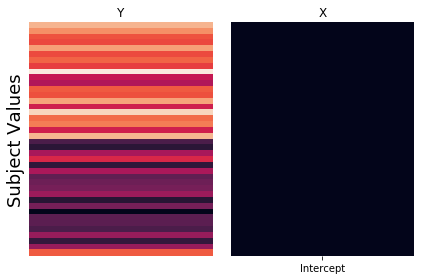

In [86]:
# Simulate Data
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y))})

def run_regression_simulation(x, y):
    '''This Function runs a regression and outputs results'''
    # Estimate Regression
    b, t, p, df, res = regress(x, y)
    print(f"betas: {b}")
    if x.shape[1] > 1:
        print(f"beta1 + beta2: {b[0] + b[1]}")
        print(f"beta1 - beta2: {b[0] - b[1]}")
    print(f"mean(y): {np.mean(y)}")
    print(f"mean(group1): {np.mean(group1)}")
    print(f"mean(group2): {np.mean(group2)}")
    print(f"mean(group1) - mean(group2): {np.mean(group1)-np.mean(group2)}")

    # Create Plot
    f,a = plt.subplots(ncols=2, sharey=True)
    sns.heatmap(pd.DataFrame(y), ax=a[0], cbar=False, yticklabels=False, xticklabels=False)
    sns.heatmap(x, ax=a[1], cbar=False, yticklabels=False)
    a[0].set_ylabel('Subject Values', fontsize=18)    
    a[0].set_title('Y')    
    a[1].set_title('X')
    plt.tight_layout()
    
run_regression_simulation(x, y)
    

## Dummy Codes

$$
\begin{bmatrix}
s_1 \\
s_2 \\
s_3 \\
s_4 \\
s_5 \\
s_6
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 & 1\\
1 & 1\\
1 & 1\\
1 & 0\\
1 & 0\\
1 & 0
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}
$$


betas: [5.12451205 5.23206959]
beta1 + beta2: 10.356581640839789
beta1 - beta2: -0.10755753131001544
mean(y): 7.740546847802338
mean(group1): 10.356581640839789
mean(group2): 5.124512054764885
mean(group1) - mean(group2): 5.232069586074903


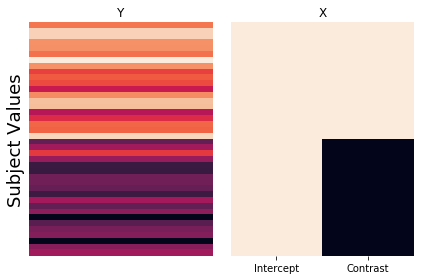

In [87]:
# Simulate Data
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y)), 'Contrast':np.hstack([np.ones(group1_params['n']), np.zeros(group2_params['n'])])})

run_regression_simulation(x, y)
  

## Contrasts

Another way to compare two different groups is by creating a model with

$$
\begin{bmatrix}
s_1 \\
s_2 \\
s_3 \\
s_4 \\
s_5 \\
s_6
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 & 1\\
1 & 1\\
1 & 1\\
1 & -1\\
1 & -1\\
1 & -1
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}
$$


betas: [7.10389995 2.18625077]
beta1 + beta2: 9.290150715506186
beta1 - beta2: 4.917649180907335
mean(y): 7.103899948206762
mean(group1): 9.290150715506188
mean(group2): 4.917649180907335
mean(group1) - mean(group2): 4.372501534598853


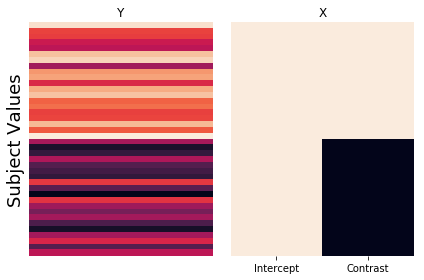

In [89]:
# Simulate Data
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y)), 'Contrast':np.hstack([np.ones(group1_params['n']), -1*np.ones(group2_params['n'])])})

run_regression_simulation(x, y)

What if the group sizes are unbalanced?  Will this effect our results?

To test this, we will double the sample size of group1 and rerun the simulation.

betas: [7.51837082 2.22126506]
beta1 + beta2: 9.739635879581234
beta1 - beta2: 5.297105766399245
mean(y): 8.25879250852057
mean(group1): 9.739635879581234
mean(group2): 5.297105766399245
mean(group1) - mean(group2): 4.44253011318199


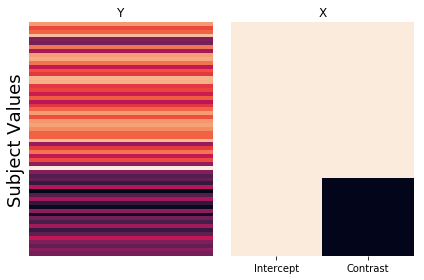

In [90]:
# Simulate Data
group1_params = {'n':40, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Intercept':np.ones(len(y)), 'Contrast':np.hstack([np.ones(group1_params['n']), -1*np.ones(group2_params['n'])])})

run_regression_simulation(x, y)

## Modeling Group Means Separately

$$
\begin{bmatrix}
s_1 \\
s_2 \\
s_3 \\
s_4 \\
s_5 \\
s_6
\end{bmatrix}
\quad
=
\quad
\begin{bmatrix}
1 & 0\\
1 & 0\\
1 & 0\\
0 & 1\\
0 & 1\\
0 & 1
\end{bmatrix}
\begin{bmatrix}
b_0 \\
b_1
\end{bmatrix}
$$

betas: [10.28797624  5.19391029]
beta1 + beta2: 15.481886524986406
beta1 - beta2: 5.094065947374931
mean(y): 7.740943262493204
mean(group1): 10.287976236180672
mean(group2): 5.193910288805737
mean(group1) - mean(group2): 5.094065947374935


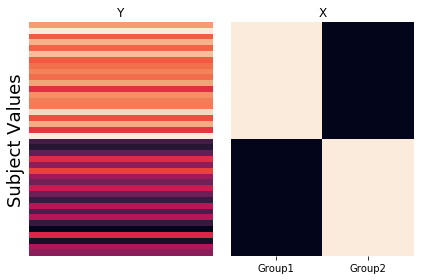

In [91]:
# Simulate Data
group1_params = {'n':20, 'mean':10, 'sd':2}
group2_params = {'n':20, 'mean':5, 'sd':2}
group1 = group1_params['mean'] + np.random.randn(group1_params['n']) * group1_params['sd']
group2 = group2_params['mean'] + np.random.randn(group2_params['n']) * group2_params['sd']

y = np.hstack([group1, group2])
x = pd.DataFrame({'Group1':np.hstack([np.ones(len(group1)), np.zeros(len(group2))]), 'Group2':np.hstack([np.zeros(len(group1)), np.ones(len(group2))])})

run_regression_simulation(x, y)

In [58]:
# Create Plot
plt.figure()
plt.hist(group1)
plt.hist(group2)
plt.axvline(x=np.mean(group1))
plt.axvline(x=np.mean(group2))

array([ 9.12988884,  8.65763516,  4.63425286,  9.95215938,  7.67814641,
       12.59015395, 11.74022102,  8.24708516,  8.32141022, 13.4251929 ,
        9.96547594, 11.3749677 ,  9.44185128, 10.42667277, 10.07317282,
       10.77373198,  9.81029412,  9.58863186, 11.73751513, 11.13132051,
        8.42706649,  0.52564773,  4.98590619,  0.9337393 ,  3.93031897,
        4.41152863,  6.96252694,  3.78651248,  3.87443573,  5.53165557,
        5.24683567,  5.88248183, 10.51942195,  5.45791057,  3.59717407,
        6.11362642,  4.87956305,  8.35471367,  2.74646782,  5.38086938])